# <span style="color:RED">PROJECT</span>

## <span style="color:blue">TOPIC: Bike Purchased (Logistic Regression)
</span>

## <span style="color:purple">Task: Predict whether a customer will purchase a bike.
</span>


In [622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 



In [623]:
import os
os.getcwd()


'/Users/sanchita'

In [624]:
A = pd.read_csv("Bike_Sales_Dashboard.csv")
A

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No


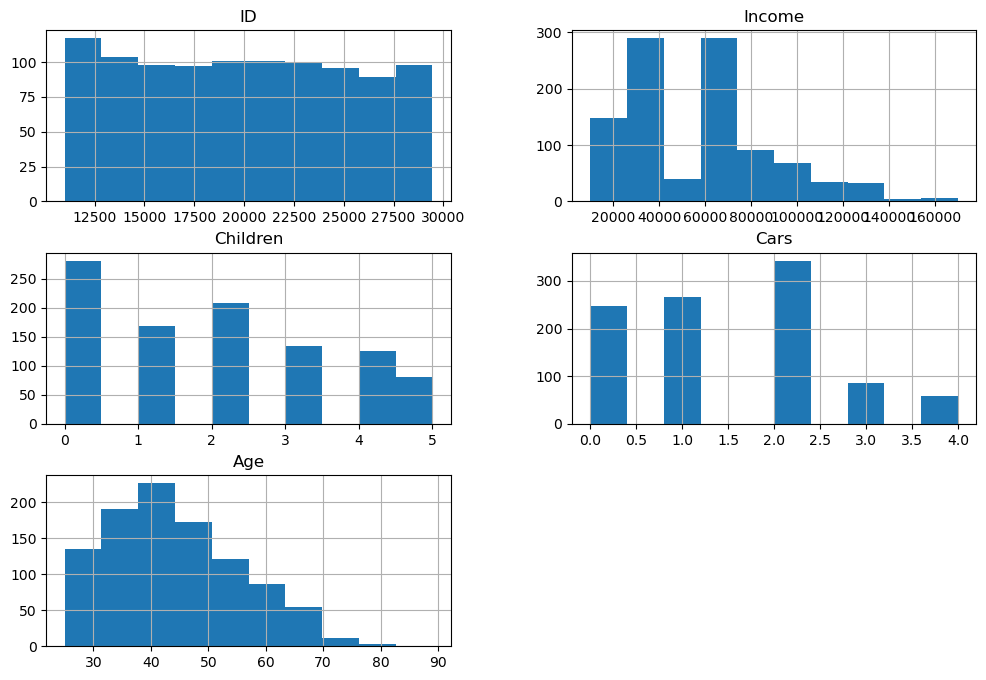

In [625]:
A.hist(figsize=(12,8))
plt.show()

In [626]:
a= A.corr(numeric_only = True)
a

,ID,Income,Children,Cars,Age
ID,1.000000,-0.073531,-0.030987,0.032816,-0.049908
Income,-0.073531,1.000000,0.258603,0.428701,0.170077
Children,-0.030987,0.258603,1.000000,0.263360,0.529743
Cars,0.032816,0.428701,0.263360,1.000000,0.188040
Age,-0.049908,0.170077,0.529743,0.188040,1.000000


<Axes: >

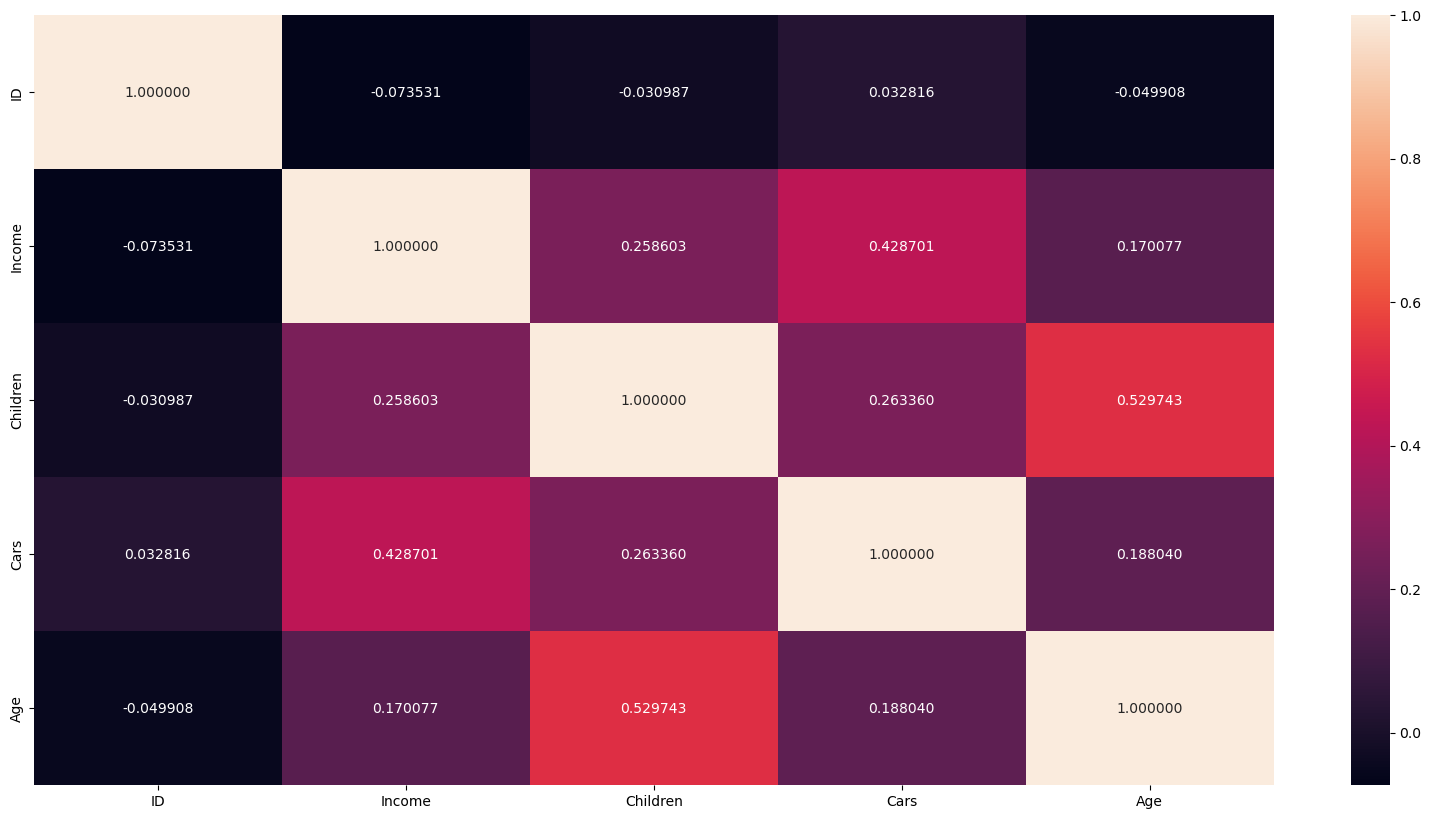

In [627]:
plt.figure(figsize =(20,10))
sns.heatmap(a,fmt = '2f', annot = True)

In [628]:
A.columns

Index(['ID', 'Martial Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Age Brackets', 'Purchased Bike'],
      dtype='object')

# Value count of Purchased Bike

In [630]:
A['Purchased Bike'].value_counts()

Purchased Bike
No     519
Yes    481
Name: count, dtype: int64

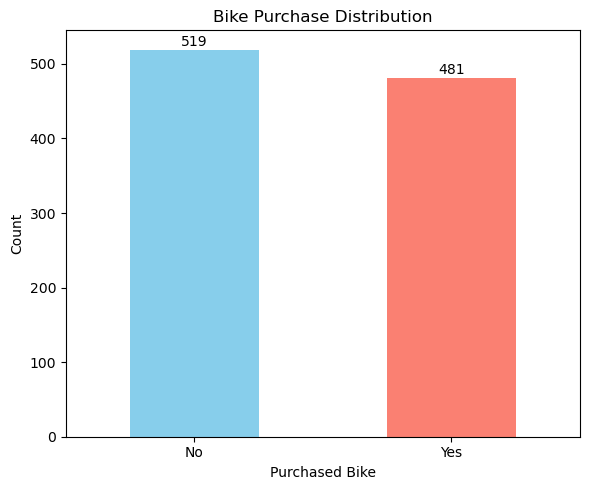

In [631]:
import matplotlib.pyplot as plt

# Create bar plot from value counts
value_counts = A['Purchased Bike'].value_counts()
ax = value_counts.plot(kind='bar', figsize=(6, 5), color=['skyblue', 'salmon'])

# Add labels on top of bars
for i, v in enumerate(value_counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title("Bike Purchase Distribution")
plt.xlabel("Purchased Bike")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# GENDER

### No. of males and females in the data

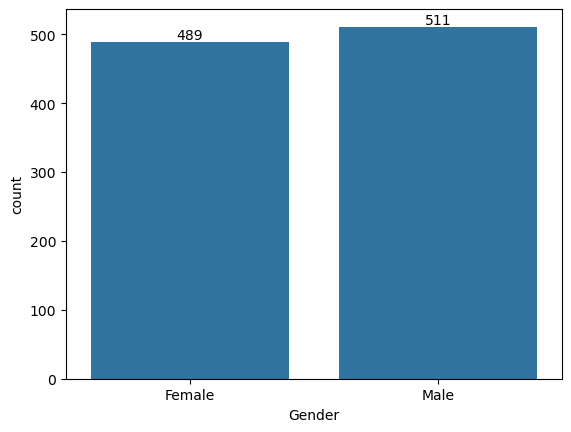

In [634]:
ax=sns.countplot(x='Gender',data=A)
for bars in ax.containers:
    ax.bar_label(bars)

### Bike Purchase Count by Gender

In [636]:
A["Gender"].value_counts()

Gender
Male      511
Female    489
Name: count, dtype: int64

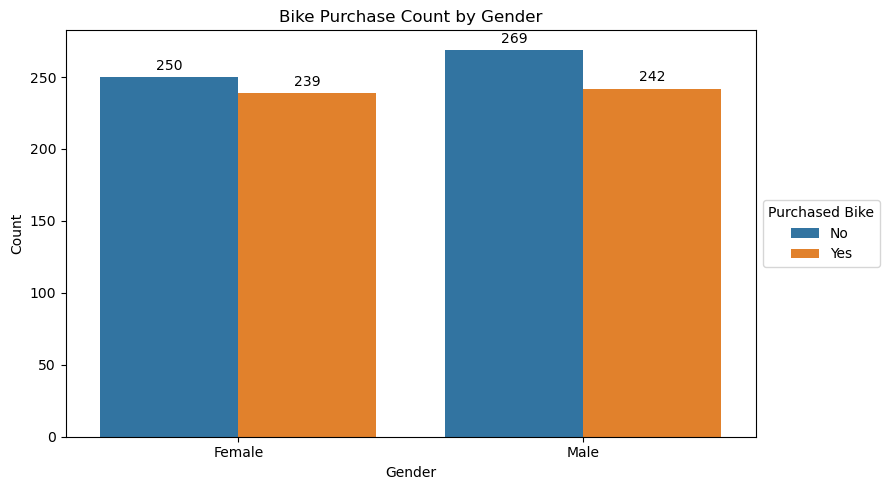

In [637]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))  # slightly wider

# Countplot
ax = sns.countplot(data=A, x='Gender', hue='Purchased Bike')

# Title and labels
plt.title("Bike Purchase Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Add value labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Place legend just outside the plot
plt.legend(title="Purchased Bike", loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()



# MARITAL STATUS

In [639]:
A["Martial Status"].value_counts()

Martial Status
Married    538
Single     462
Name: count, dtype: int64

### Bike Purchase on the basis of Marital Status

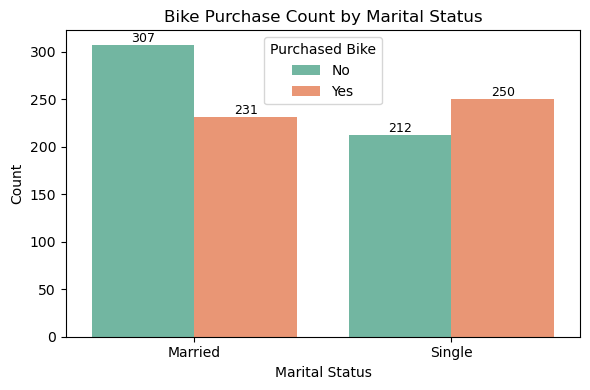

In [641]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=A, x='Martial Status', hue='Purchased Bike', palette='Set2')
plt.title("Bike Purchase Count by Marital Status")
plt.ylabel("Count")
plt.xlabel("Marital Status")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


In [642]:
## The analysis shows that a higher proportion of single individuals purchase bikes compared to married ones. 
## This could be due to lifestyle preferences, commuting habits, or economic considerations."

# EDUCATION

In [644]:
A["Education"].value_counts()

Education
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: count, dtype: int64

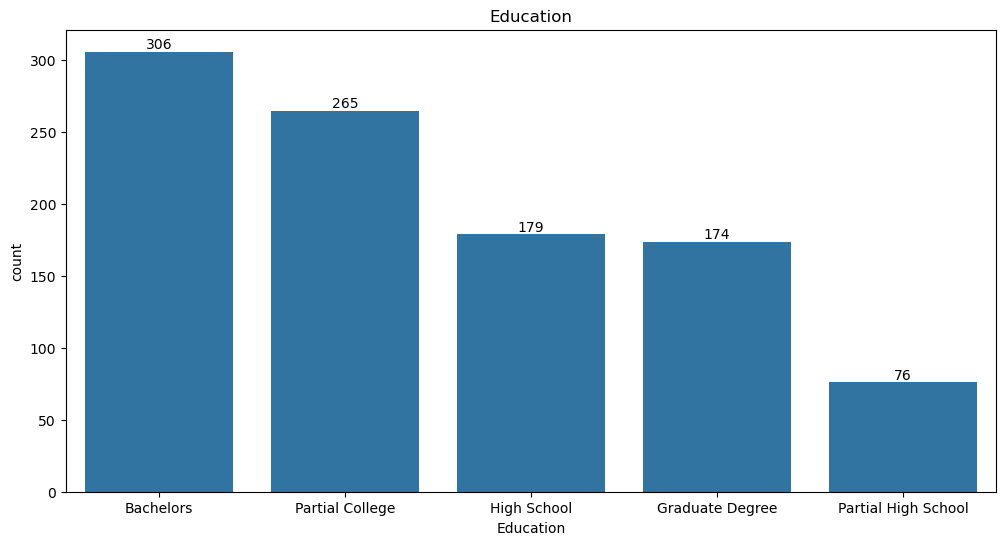

In [645]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='Education',data=A,order=A["Education"].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Education")
plt.show()


### Bike Purchase by Education Level

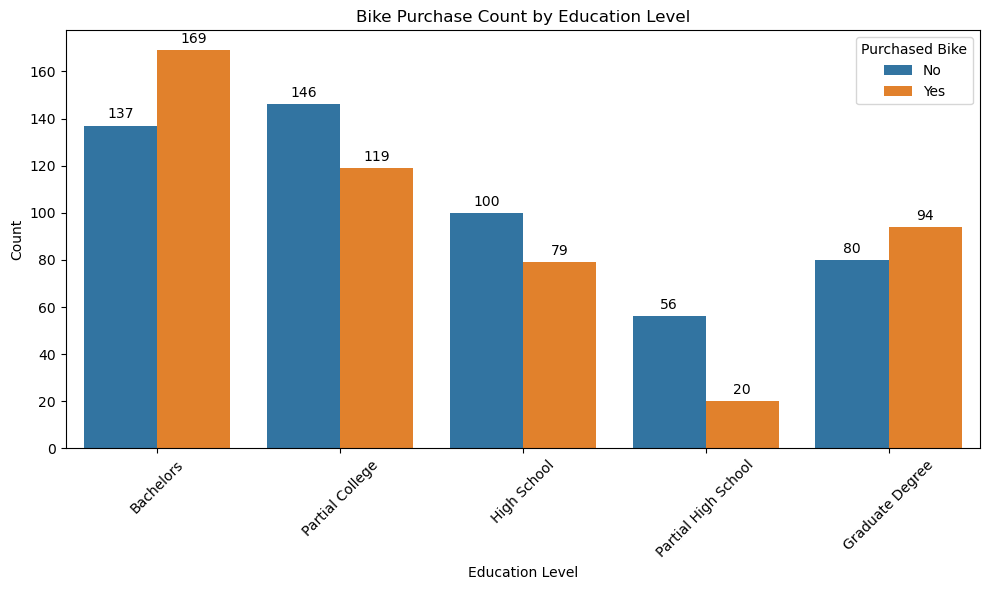

In [647]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=A, x='Education', hue='Purchased Bike')
plt.title("Bike Purchase Count by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.tight_layout()
plt.show()


# AGE

In [649]:
A["Age"].value_counts()

Age
40    42
47    39
36    37
38    37
43    36
35    36
42    34
32    33
37    32
34    31
45    31
48    29
41    28
30    27
46    27
44    27
52    25
31    25
53    24
50    24
49    23
27    23
51    22
39    22
28    22
33    21
59    20
55    18
29    16
26    16
56    16
54    16
60    15
66    14
62    13
58    12
67    10
64    10
63     9
65     9
61     9
57     8
69     8
25     6
73     4
70     4
68     3
78     2
80     1
89     1
74     1
71     1
72     1
Name: count, dtype: int64

In [650]:
A["Age Brackets"].value_counts()

Age Brackets
Middle Age    701
Old           189
Adolescent    110
Name: count, dtype: int64

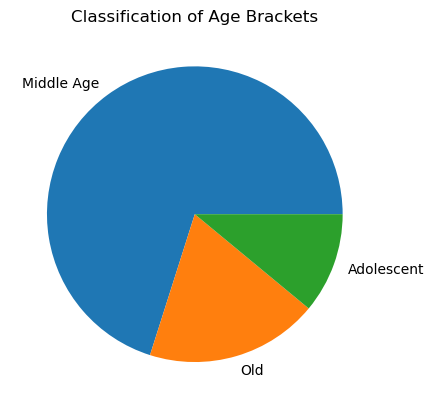

In [651]:
y = np.array([701,189,110])

mylabels = ["Middle Age","Old","Adolescent"]
plt.title("Classification of Age Brackets")

plt.pie(y, labels = mylabels)
plt.show() 


### Bike Purchase on the basis of Age

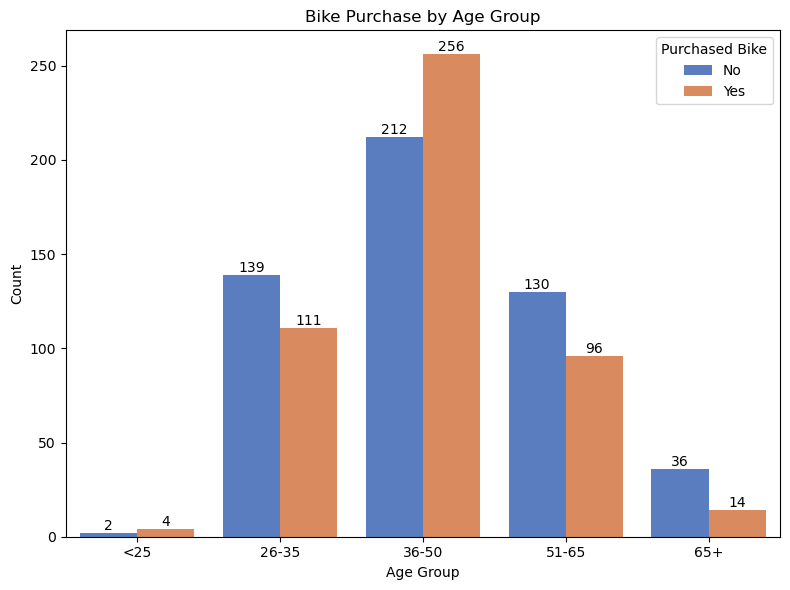

In [653]:
# Create age bins
A['Age Group'] = pd.cut(A['Age'], bins=[0, 25, 35, 50, 65, 100],
                         labels=['<25', '26-35', '36-50', '51-65', '65+'])

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=A, x='Age Group', hue='Purchased Bike', palette='muted')
plt.title("Bike Purchase by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()

# COMMUTE DISTANCE

In [655]:
A['Commute Distance'].value_counts()

Commute Distance
0-1 Miles             366
5-10 Miles            192
1-2 Miles             169
2-5 Miles             162
More than 10 Miles    111
Name: count, dtype: int64

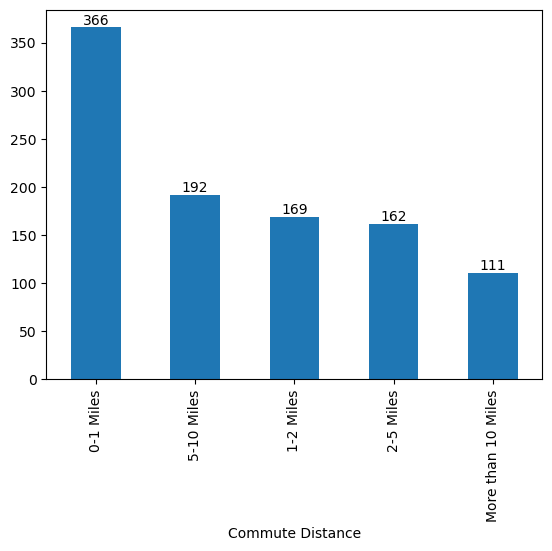

In [656]:
ax=A['Commute Distance'].value_counts().plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)

### Bike Purchase by Commute Distance

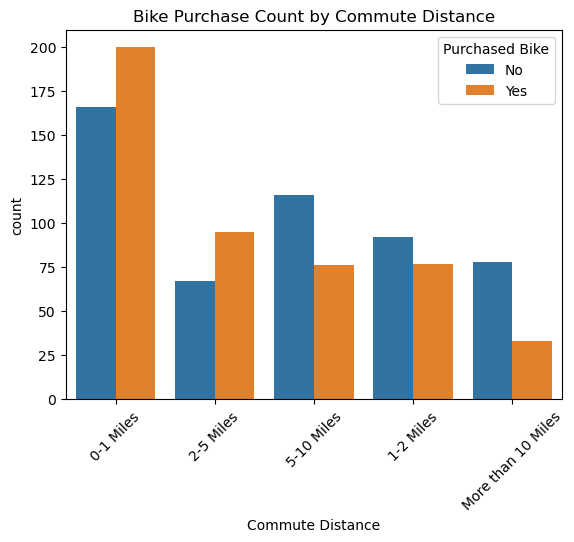

In [658]:
sns.countplot(data=A, x='Commute Distance', hue='Purchased Bike')
plt.title("Bike Purchase Count by Commute Distance")
plt.xticks(rotation=45)
plt.show()

# OCCUPATION

In [660]:
A["Occupation"].value_counts()

Occupation
Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: count, dtype: int64

 ### Bike Purchase by Occupation

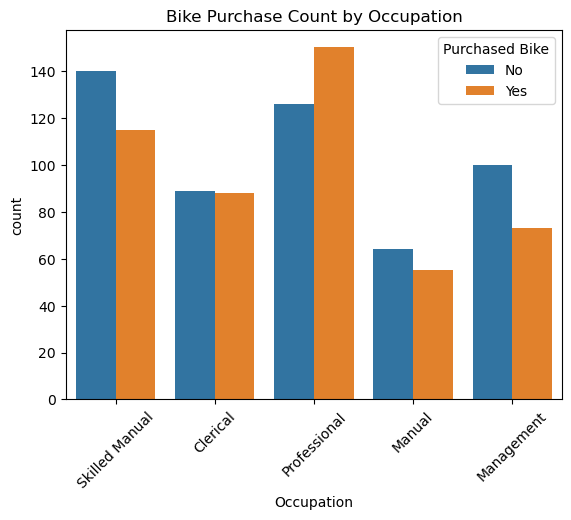

In [662]:
sns.countplot(data=A, x='Occupation', hue='Purchased Bike')
plt.title("Bike Purchase Count by Occupation")
plt.xticks(rotation=45)
plt.show()


### HOME OWNERSHIP

In [664]:
A["Home Owner"].value_counts()

Home Owner
Yes    683
No     317
Name: count, dtype: int64

### Bike Purchase Count by Home Ownership

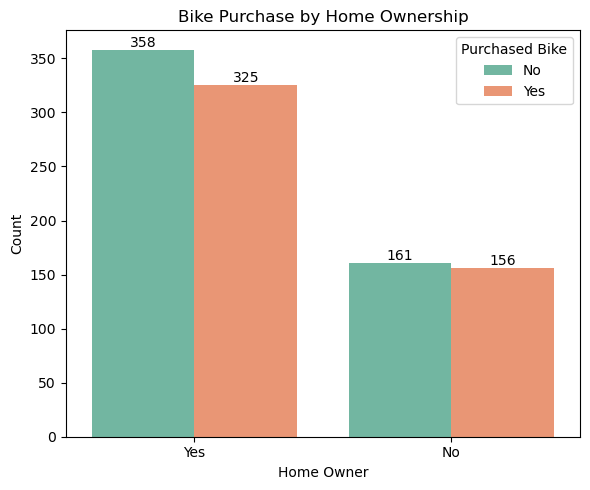

In [666]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=A, x='Home Owner', hue='Purchased Bike', palette='Set2')
plt.title("Bike Purchase by Home Ownership")
plt.xlabel("Home Owner")
plt.ylabel("Count")

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()


# REGION

In [668]:
A["Region"].value_counts()

Region
North America    508
Europe           300
Pacific          192
Name: count, dtype: int64

### Region-wise Bike Purchase

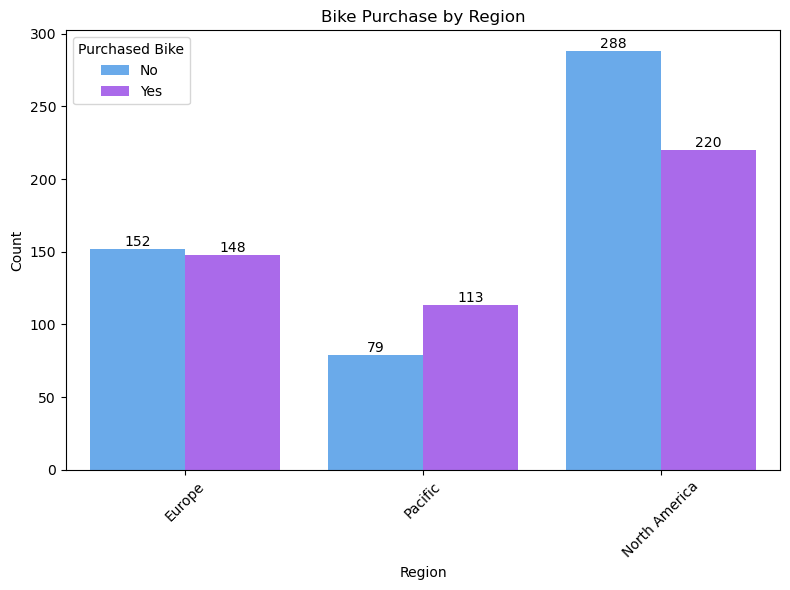

In [670]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=A, x='Region', hue='Purchased Bike', palette='cool')
plt.title("Bike Purchase by Region")
plt.xlabel("Region")
plt.ylabel("Count")

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CHILDREN

In [672]:
A['Children'].value_counts()

Children
0    281
2    209
1    169
3    134
4    126
5     81
Name: count, dtype: int64

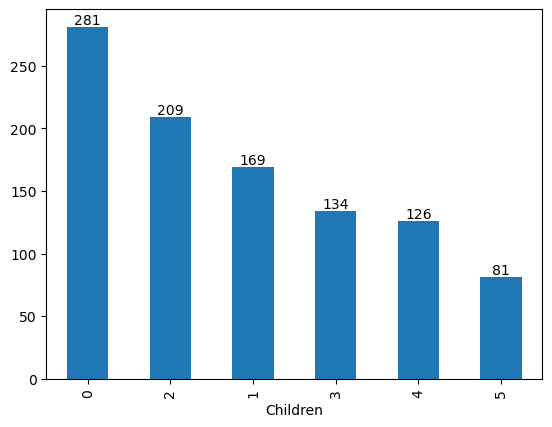

In [673]:
ax=A['Children'].value_counts().plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)

### Bike Purchase on the basis of No. of children

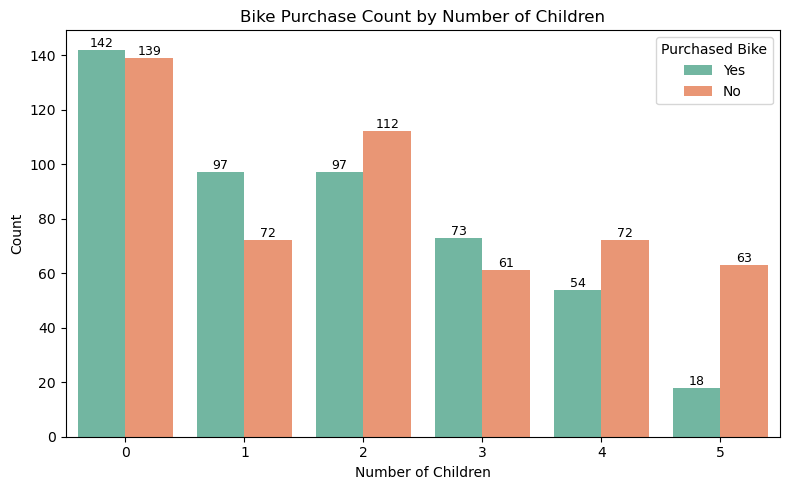

In [675]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=A, x='Children', hue='Purchased Bike', palette='Set2')
plt.title("Bike Purchase Count by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Count")

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


# CARS

In [677]:
A['Cars'].value_counts()

Cars
2    342
1    267
0    247
3     85
4     59
Name: count, dtype: int64

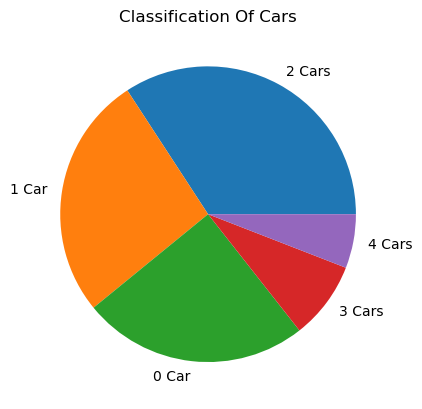

In [678]:
y = np.array([342, 267, 247, 85,59])
mylabels = ["2 Cars", "1 Car", "0 Car", "3 Cars", "4 Cars"]
plt.title("Classification Of Cars")

plt.pie(y, labels = mylabels)
plt.show() 

### Bike Purchase by Number of Cars Owned

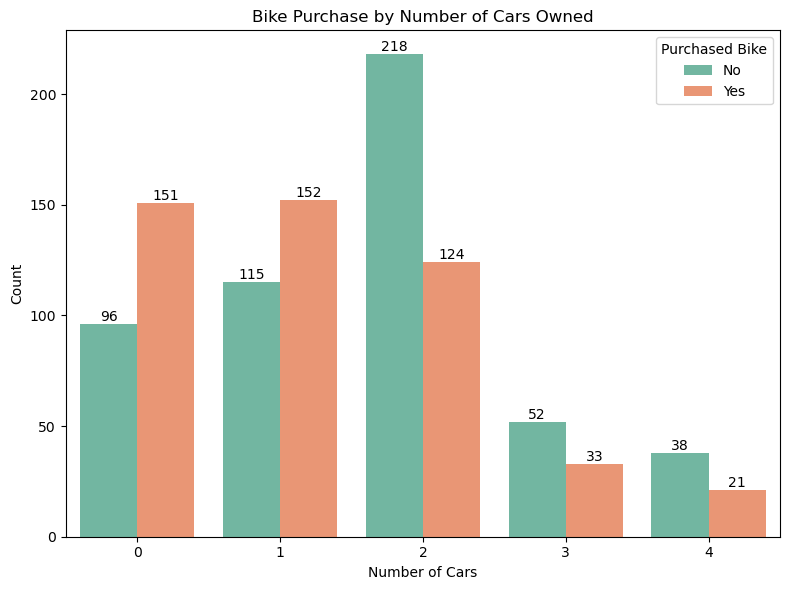

In [680]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=A, x='Cars', hue='Purchased Bike', palette='Set2')
plt.title("Bike Purchase by Number of Cars Owned")
plt.xlabel("Number of Cars")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()


In [681]:
A.dtypes

ID                     int64
Martial Status        object
Gender                object
Income                 int64
Children               int64
Education             object
Occupation            object
Home Owner            object
Cars                   int64
Commute Distance      object
Region                object
Age                    int64
Age Brackets          object
Purchased Bike        object
Age Group           category
dtype: object

In [682]:
A.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56360.000000,1.898000,1.442000,44.163000
std,5347.333948,31085.635215,1.628572,1.125123,11.364488
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


<Axes: >

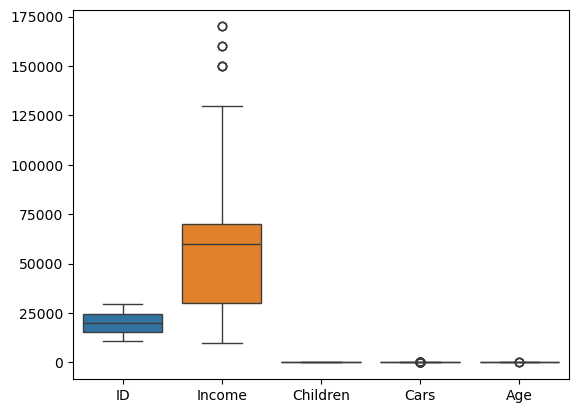

In [683]:
sns.boxplot(A)

<Axes: ylabel='Income'>

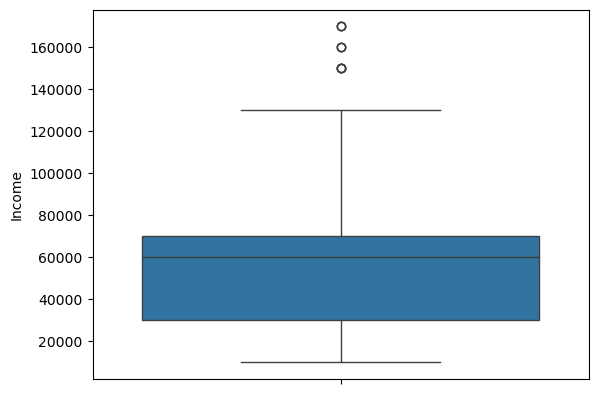

In [684]:
sns.boxplot(data=A, y = 'Income')

<Axes: ylabel='Cars'>

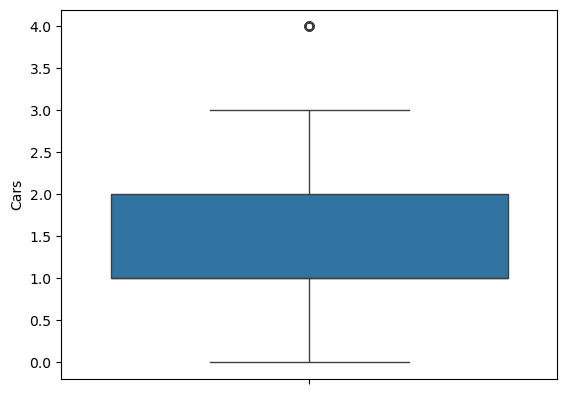

In [685]:
sns.boxplot(data=A, y = 'Cars')

<Axes: ylabel='Age'>

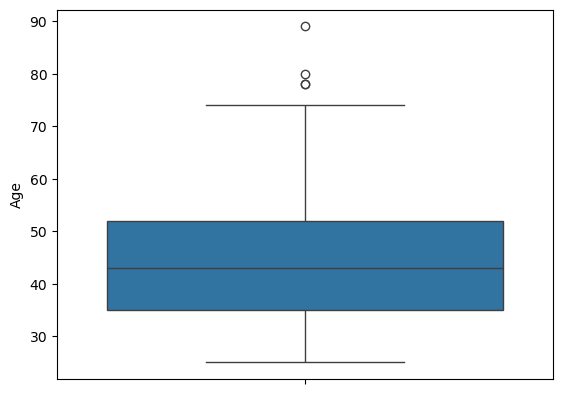

In [686]:
sns.boxplot(data=A, y = 'Age')

<Axes: ylabel='Children'>

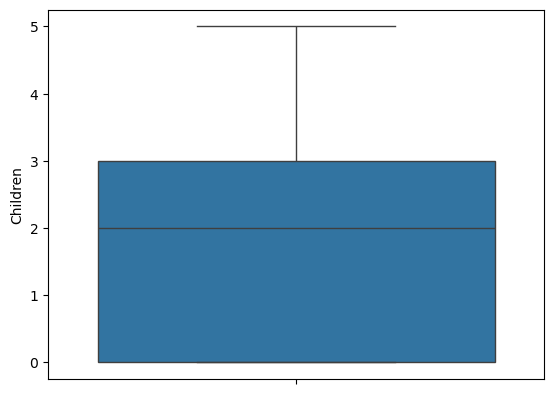

In [687]:
sns.boxplot(data=A, y = 'Children')

In [688]:
n = A[['Age', 'Cars','Income']]   #correcting outliners 

In [689]:
for c in n.columns:
    percentile25=n[c].quantile(0.25)
    percentile75=n[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    
    
    A=A[A[c]<upper_limit]
    A=A[A[c]>lower_limit]
    
    n=n[n[c]<upper_limit]
    n=n[n[c]>lower_limit]
    
A,n

(        ID Martial Status  Gender  Income  Children        Education  \
 0    12496        Married  Female   40000         1        Bachelors   
 1    24107        Married    Male   30000         3  Partial College   
 2    14177        Married    Male   80000         5  Partial College   
 3    24381         Single    Male   70000         0        Bachelors   
 4    25597         Single    Male   30000         0        Bachelors   
 ..     ...            ...     ...     ...       ...              ...   
 995  23731        Married    Male   60000         2      High School   
 996  28672         Single    Male   70000         4  Graduate Degree   
 997  11809        Married    Male   60000         2        Bachelors   
 998  19664         Single    Male  100000         3        Bachelors   
 999  12121         Single    Male   60000         3      High School   
 
          Occupation Home Owner  Cars    Commute Distance         Region  Age  \
 0    Skilled Manual        Yes     0    

<Axes: ylabel='Age'>

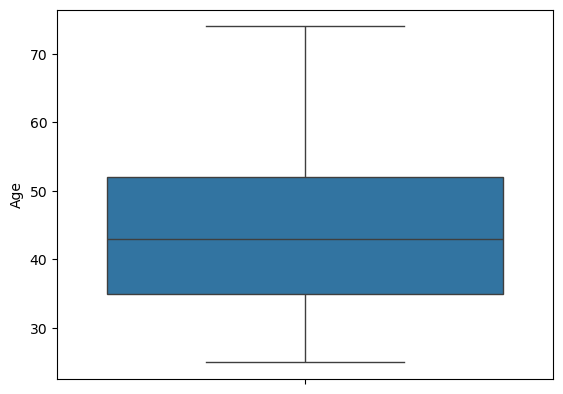

In [690]:
sns.boxplot(data=A, y = 'Age')

<Axes: ylabel='Income'>

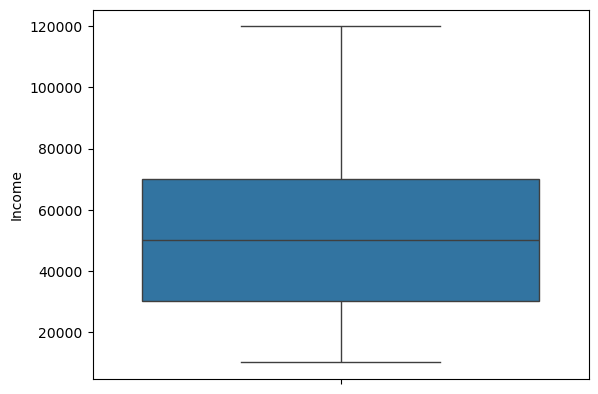

In [691]:
sns.boxplot(data=A, y = 'Income')

<Figure size 300x300 with 0 Axes>

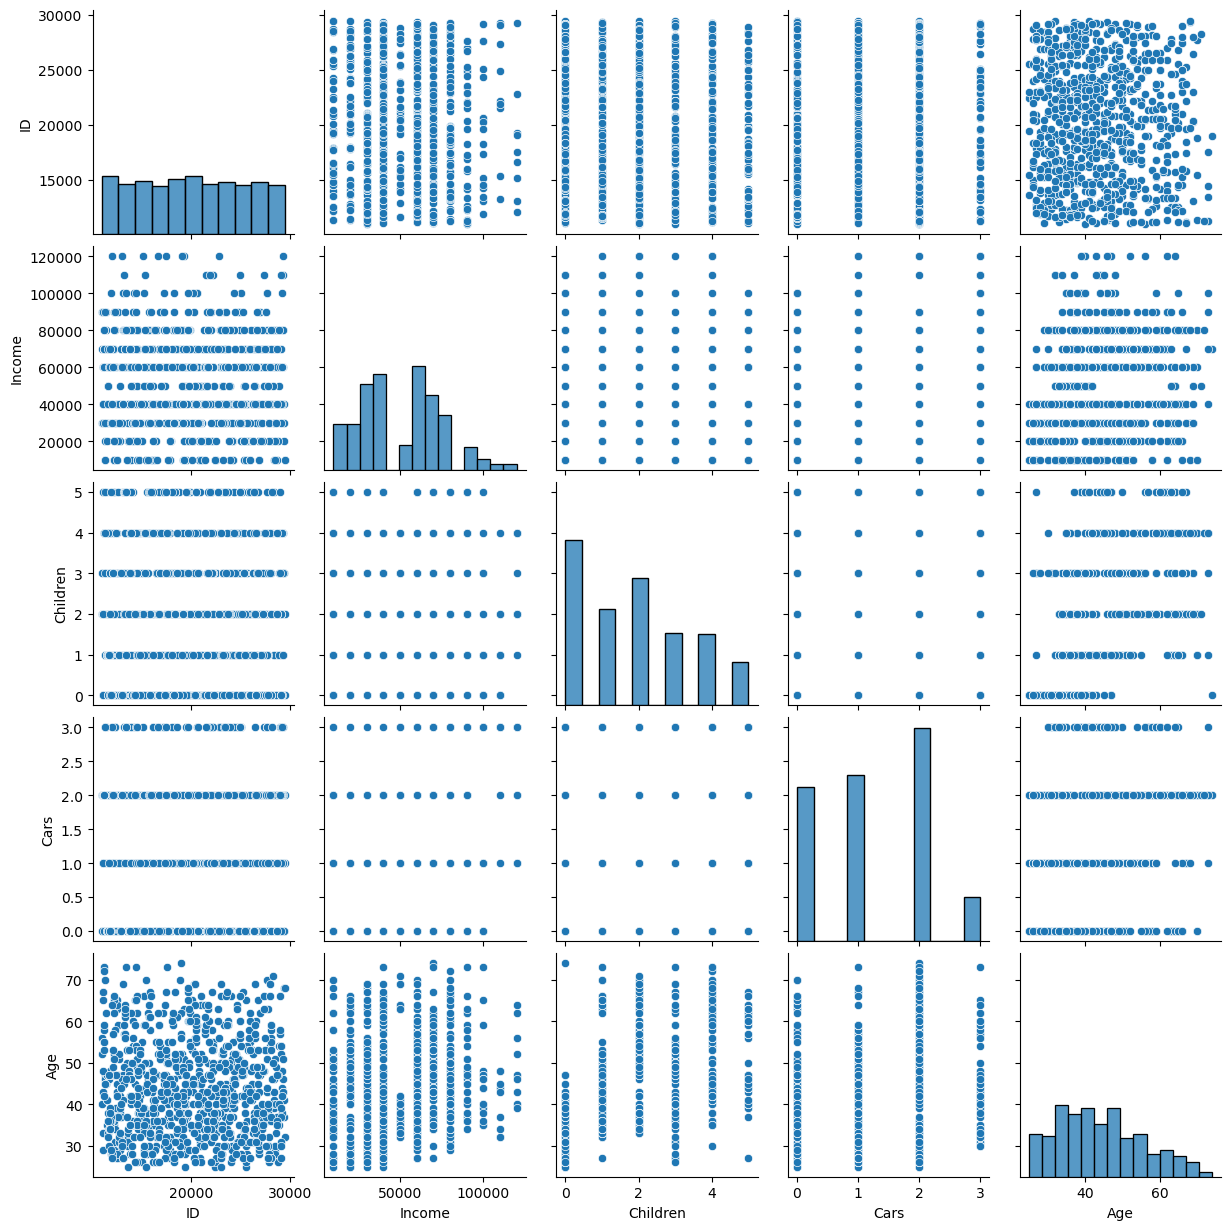

In [692]:
plt.figure(figsize = (3,3))
sns.pairplot(A)



#  DATA PREPROCESSING

In [694]:
A

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike,Age Group
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No,36-50
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No,36-50
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No,51-65
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes,36-50
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes,51-65
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes,26-35
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes,36-50
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No,36-50


In [695]:
A.isnull().sum()

ID                  0
Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
Age Group           0
dtype: int64

In [696]:
numerical_values = ['ID', 'Income', 'Children', 'Cars', 'Age']
categorical_values = A.drop(columns=numerical_values).columns.tolist()

In [697]:
categorical_values

['Martial Status',
 'Gender',
 'Education',
 'Occupation',
 'Home Owner',
 'Commute Distance',
 'Region',
 'Age Brackets',
 'Purchased Bike',
 'Age Group']

In [698]:
numerical_values

['ID', 'Income', 'Children', 'Cars', 'Age']

In [699]:
categorical = A[categorical_values]

In [700]:
categorical

,Martial Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Age Brackets,Purchased Bike,Age Group
0,Married,Female,Bachelors,Skilled Manual,Yes,0-1 Miles,Europe,Middle Age,No,36-50
1,Married,Male,Partial College,Clerical,Yes,0-1 Miles,Europe,Middle Age,No,36-50
2,Married,Male,Partial College,Professional,No,2-5 Miles,Europe,Old,No,51-65
3,Single,Male,Bachelors,Professional,Yes,5-10 Miles,Pacific,Middle Age,Yes,36-50
4,Single,Male,Bachelors,Clerical,No,0-1 Miles,Europe,Middle Age,Yes,36-50
...,...,...,...,...,...,...,...,...,...,...
995,Married,Male,High School,Professional,Yes,2-5 Miles,North America,Middle Age,Yes,51-65
996,Single,Male,Graduate Degree,Professional,Yes,2-5 Miles,North America,Middle Age,Yes,26-35
997,Married,Male,Bachelors,Skilled Manual,Yes,0-1 Miles,North America,Middle Age,Yes,36-50
998,Single,Male,Bachelors,Management,No,1-2 Miles,North America,Middle Age,No,36-50


## ENCODING CATEGORICAL VALUES

In [702]:
p = pd.get_dummies(categorical, columns=categorical_values, drop_first=True)
p = p.astype(int)
p

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Commute Distance_More than 10 Miles,Region_North America,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike_Yes,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
996,1,1,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,1,0,0,0
997,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
998,1,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [703]:
numerical_values

['ID', 'Income', 'Children', 'Cars', 'Age']

In [704]:
numerical_A = A[numerical_values]

In [705]:
numerical_A

,ID,Income,Children,Cars,Age
0,12496,40000,1,0,42
1,24107,30000,3,1,43
2,14177,80000,5,2,60
3,24381,70000,0,1,41
4,25597,30000,0,0,36
...,...,...,...,...,...
995,23731,60000,2,2,54
996,28672,70000,4,0,35
997,11809,60000,2,0,38
998,19664,100000,3,3,38


## SCALING THE NUMERICAL VALUES

### Using minmax scalar

In [708]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [709]:
A_num_mm = mm.fit_transform(numerical_A)

In [710]:
q = A_num_mm 

In [711]:
q

array([[0.0810972 , 0.27272727, 0.2       , 0.        , 0.34693878],
       [0.71052204, 0.18181818, 0.6       , 0.33333333, 0.36734694],
       [0.17222313, 0.63636364, 1.        , 0.66666667, 0.71428571],
       ...,
       [0.04385537, 0.45454545, 0.4       , 0.        , 0.26530612],
       [0.46966987, 0.81818182, 0.6       , 1.        , 0.26530612],
       [0.06076869, 0.45454545, 0.6       , 0.66666667, 0.57142857]])

In [712]:
q_A = pd.DataFrame(q, columns = numerical_values)
q_A

,ID,Income,Children,Cars,Age
0,0.081097,0.272727,0.2,0.000000,0.346939
1,0.710522,0.181818,0.6,0.333333,0.367347
2,0.172223,0.636364,1.0,0.666667,0.714286
3,0.725375,0.545455,0.0,0.333333,0.326531
4,0.791294,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...
907,0.690139,0.454545,0.4,0.666667,0.591837
908,0.957988,0.545455,0.8,0.000000,0.204082
909,0.043855,0.454545,0.4,0.000000,0.265306
910,0.469670,0.818182,0.6,1.000000,0.265306


### USING STD SCALAR

In [714]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [715]:
A_num_ss = ss.fit_transform(numerical_A)

In [716]:
r = A_num_ss

In [717]:
r

array([[-1.42515219, -0.43283615, -0.53326276, -1.34169228, -0.16340404],
       [ 0.75278949, -0.83318765,  0.70738937, -0.27395811, -0.07490969],
       [-1.1098374 ,  1.16856982,  1.94804151,  0.79377606,  1.42949423],
       ...,
       [-1.55401671,  0.36786683,  0.08706331, -1.34169228, -0.51738143],
       [-0.08060943,  1.96927281,  0.70738937,  1.86151023, -0.51738143],
       [-1.49549308,  0.36786683,  0.70738937,  0.79377606,  0.81003379]])

In [718]:
r_A = pd.DataFrame(r, columns = numerical_values)
r_A

,ID,Income,Children,Cars,Age
0,-1.425152,-0.432836,-0.533263,-1.341692,-0.163404
1,0.752789,-0.833188,0.707389,-0.273958,-0.074910
2,-1.109837,1.168570,1.948042,0.793776,1.429494
3,0.804185,0.768218,-1.153589,-0.273958,-0.251898
4,1.032277,-0.833188,-1.153589,-1.341692,-0.694370
...,...,...,...,...,...
907,0.682261,0.367867,0.087063,0.793776,0.898528
908,1.609073,0.768218,1.327715,-1.341692,-0.782864
909,-1.554017,0.367867,0.087063,-1.341692,-0.517381
910,-0.080609,1.969273,0.707389,1.861510,-0.517381


#### concate minmax scaler as concate_1 

In [720]:
p

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Commute Distance_More than 10 Miles,Region_North America,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike_Yes,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
996,1,1,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,1,0,0,0
997,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
998,1,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [721]:
q_A

,ID,Income,Children,Cars,Age
0,0.081097,0.272727,0.2,0.000000,0.346939
1,0.710522,0.181818,0.6,0.333333,0.367347
2,0.172223,0.636364,1.0,0.666667,0.714286
3,0.725375,0.545455,0.0,0.333333,0.326531
4,0.791294,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...
907,0.690139,0.454545,0.4,0.666667,0.591837
908,0.957988,0.545455,0.8,0.000000,0.204082
909,0.043855,0.454545,0.4,0.000000,0.265306
910,0.469670,0.818182,0.6,1.000000,0.265306


In [722]:
p.columns

Index(['Martial Status_Single', 'Gender_Male', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Management',
       'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Home Owner_Yes',
       'Commute Distance_1-2 Miles', 'Commute Distance_2-5 Miles',
       'Commute Distance_5-10 Miles', 'Commute Distance_More than 10 Miles',
       'Region_North America', 'Region_Pacific', 'Age Brackets_Middle Age',
       'Age Brackets_Old', 'Purchased Bike_Yes', 'Age Group_26-35',
       'Age Group_36-50', 'Age Group_51-65', 'Age Group_65+'],
      dtype='object')

In [723]:
q_A.columns

Index(['ID', 'Income', 'Children', 'Cars', 'Age'], dtype='object')

In [724]:
p.reset_index(drop=True, inplace=True)
q_A.reset_index(drop=True, inplace=True)

In [725]:
p,q_A

(     Martial Status_Single  Gender_Male  Education_Graduate Degree  \
 0                        0            0                          0   
 1                        0            1                          0   
 2                        0            1                          0   
 3                        1            1                          0   
 4                        1            1                          0   
 ..                     ...          ...                        ...   
 907                      0            1                          0   
 908                      1            1                          1   
 909                      0            1                          0   
 910                      1            1                          0   
 911                      1            1                          0   
 
      Education_High School  Education_Partial College  \
 0                        0                          0   
 1                        0   

In [726]:
concate_1 = pd.concat([p,q_A],axis = 1, join = 'outer')
concate_1

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Purchased Bike_Yes,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+,ID,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0.081097,0.272727,0.2,0.000000,0.346939
1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.710522,0.181818,0.6,0.333333,0.367347
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0.172223,0.636364,1.0,0.666667,0.714286
3,1,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0.725375,0.545455,0.0,0.333333,0.326531
4,1,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.791294,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0.690139,0.454545,0.4,0.666667,0.591837
908,1,1,1,0,0,0,0,0,1,0,...,1,1,0,0,0,0.957988,0.545455,0.8,0.000000,0.204082
909,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0.043855,0.454545,0.4,0.000000,0.265306
910,1,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.469670,0.818182,0.6,1.000000,0.265306


#### concate std scalar as concate_2

In [728]:
p

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Commute Distance_More than 10 Miles,Region_North America,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike_Yes,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
908,1,1,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,1,0,0,0
909,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
910,1,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [729]:
r_A

,ID,Income,Children,Cars,Age
0,-1.425152,-0.432836,-0.533263,-1.341692,-0.163404
1,0.752789,-0.833188,0.707389,-0.273958,-0.074910
2,-1.109837,1.168570,1.948042,0.793776,1.429494
3,0.804185,0.768218,-1.153589,-0.273958,-0.251898
4,1.032277,-0.833188,-1.153589,-1.341692,-0.694370
...,...,...,...,...,...
907,0.682261,0.367867,0.087063,0.793776,0.898528
908,1.609073,0.768218,1.327715,-1.341692,-0.782864
909,-1.554017,0.367867,0.087063,-1.341692,-0.517381
910,-0.080609,1.969273,0.707389,1.861510,-0.517381


In [730]:
concate_2 = pd.concat([p,r_A],axis = 1)
concate_2

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Purchased Bike_Yes,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+,ID,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-1.425152,-0.432836,-0.533263,-1.341692,-0.163404
1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.752789,-0.833188,0.707389,-0.273958,-0.074910
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,-1.109837,1.168570,1.948042,0.793776,1.429494
3,1,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0.804185,0.768218,-1.153589,-0.273958,-0.251898
4,1,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1.032277,-0.833188,-1.153589,-1.341692,-0.694370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0.682261,0.367867,0.087063,0.793776,0.898528
908,1,1,1,0,0,0,0,0,1,0,...,1,1,0,0,0,1.609073,0.768218,1.327715,-1.341692,-0.782864
909,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,-1.554017,0.367867,0.087063,-1.341692,-0.517381
910,1,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,-0.080609,1.969273,0.707389,1.861510,-0.517381


### splitting 

#### minmax one 

In [733]:
concate_1

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Purchased Bike_Yes,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+,ID,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0.081097,0.272727,0.2,0.000000,0.346939
1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.710522,0.181818,0.6,0.333333,0.367347
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0.172223,0.636364,1.0,0.666667,0.714286
3,1,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0.725375,0.545455,0.0,0.333333,0.326531
4,1,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.791294,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0.690139,0.454545,0.4,0.666667,0.591837
908,1,1,1,0,0,0,0,0,1,0,...,1,1,0,0,0,0.957988,0.545455,0.8,0.000000,0.204082
909,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0.043855,0.454545,0.4,0.000000,0.265306
910,1,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.469670,0.818182,0.6,1.000000,0.265306


In [734]:
minmax_dataset = concate_1.drop(columns = 'ID')

In [735]:
minmax_dataset

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Age Brackets_Old,Purchased Bike_Yes,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0.272727,0.2,0.000000,0.346939
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.181818,0.6,0.333333,0.367347
2,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0.636364,1.0,0.666667,0.714286
3,1,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0.545455,0.0,0.333333,0.326531
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0.454545,0.4,0.666667,0.591837
908,1,1,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0.545455,0.8,0.000000,0.204082
909,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0.454545,0.4,0.000000,0.265306
910,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0.818182,0.6,1.000000,0.265306


In [736]:
x1 = minmax_dataset.drop(columns = 'Purchased Bike_Yes')
x1

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Age Brackets_Middle Age,Age Brackets_Old,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0.272727,0.2,0.000000,0.346939
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0.181818,0.6,0.333333,0.367347
2,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0.636364,1.0,0.666667,0.714286
3,1,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0.545455,0.0,0.333333,0.326531
4,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0.454545,0.4,0.666667,0.591837
908,1,1,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0.545455,0.8,0.000000,0.204082
909,0,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0.454545,0.4,0.000000,0.265306
910,1,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.818182,0.6,1.000000,0.265306


In [737]:
y1 = minmax_dataset['Purchased Bike_Yes']
y1

0      0
1      0
2      0
3      1
4      1
      ..
907    1
908    1
909    1
910    0
911    1
Name: Purchased Bike_Yes, Length: 912, dtype: int64

 ##### splitting the data set in training and testing 

In [739]:
from sklearn.model_selection import train_test_split

In [740]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.45,random_state=50)

### std scalar one

In [742]:
concate_2

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Purchased Bike_Yes,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+,ID,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-1.425152,-0.432836,-0.533263,-1.341692,-0.163404
1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.752789,-0.833188,0.707389,-0.273958,-0.074910
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,-1.109837,1.168570,1.948042,0.793776,1.429494
3,1,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0.804185,0.768218,-1.153589,-0.273958,-0.251898
4,1,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1.032277,-0.833188,-1.153589,-1.341692,-0.694370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0.682261,0.367867,0.087063,0.793776,0.898528
908,1,1,1,0,0,0,0,0,1,0,...,1,1,0,0,0,1.609073,0.768218,1.327715,-1.341692,-0.782864
909,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,-1.554017,0.367867,0.087063,-1.341692,-0.517381
910,1,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,-0.080609,1.969273,0.707389,1.861510,-0.517381


In [743]:
stdscalar_dataset = concate_1.drop(columns = 'ID')
stdscalar_dataset

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Age Brackets_Old,Purchased Bike_Yes,Age Group_26-35,Age Group_36-50,Age Group_51-65,Age Group_65+,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0.272727,0.2,0.000000,0.346939
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.181818,0.6,0.333333,0.367347
2,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0.636364,1.0,0.666667,0.714286
3,1,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0.545455,0.0,0.333333,0.326531
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0.454545,0.4,0.666667,0.591837
908,1,1,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0.545455,0.8,0.000000,0.204082
909,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0.454545,0.4,0.000000,0.265306
910,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0.818182,0.6,1.000000,0.265306


In [744]:
x2 = stdscalar_dataset.drop(columns = 'Purchased Bike_Yes')

In [745]:
y2 = stdscalar_dataset['Purchased Bike_Yes']

## Splitting the std data set 

In [747]:
from sklearn.model_selection import train_test_split

In [748]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.6,random_state=18)

# LOGISTIC REGRESSION

### minmax one

In [751]:
x1_train,x1_test

(     Martial Status_Single  Gender_Male  Education_Graduate Degree  \
 791                      0            1                          0   
 460                      0            0                          0   
 387                      1            0                          0   
 892                      0            0                          0   
 806                      1            0                          0   
 ..                     ...          ...                        ...   
 289                      0            0                          0   
 109                      1            0                          0   
 907                      0            1                          0   
 480                      1            0                          0   
 688                      0            0                          0   
 
      Education_High School  Education_Partial College  \
 791                      0                          0   
 460                      1   

In [752]:
y1_train,y1_test

(791    0
 460    0
 387    1
 892    0
 806    0
       ..
 289    1
 109    1
 907    1
 480    1
 688    0
 Name: Purchased Bike_Yes, Length: 501, dtype: int64,
 330    1
 104    1
 127    0
 765    0
 686    1
       ..
 612    0
 648    0
 755    1
 208    0
 838    1
 Name: Purchased Bike_Yes, Length: 411, dtype: int64)

In [753]:
lor = LogisticRegression()
lor.fit(x1_train, y1_train)
print("Model trained successfully.")


Model trained successfully.


In [754]:
y1_pred = lor.predict(x1_test)

### EVALUATION OF MINIMAX ONE

In [756]:
from sklearn.metrics import accuracy_score
sklearn.metrics.roc_auc_score(y1_test, y1_pred)

0.6502619671350323

In [757]:
from sklearn.metrics import roc_auc_score
sklearn.metrics.roc_auc_score(y1_test, y1_pred)

0.6502619671350323

### *Std scaler one*

In [759]:
x2_train,x2_test

(     Martial Status_Single  Gender_Male  Education_Graduate Degree  \
 365                      0            0                          1   
 570                      1            0                          0   
 763                      0            0                          0   
 516                      1            0                          0   
 735                      0            0                          0   
 ..                     ...          ...                        ...   
 702                      0            0                          0   
 837                      0            1                          0   
 120                      1            0                          0   
 275                      0            1                          0   
 298                      1            1                          0   
 
      Education_High School  Education_Partial College  \
 365                      0                          0   
 570                      0   

In [760]:
y2_train,y2_test

(365    1
 570    1
 763    1
 516    1
 735    0
       ..
 702    0
 837    0
 120    1
 275    0
 298    0
 Name: Purchased Bike_Yes, Length: 364, dtype: int64,
 568    0
 177    1
 80     1
 54     0
 628    0
       ..
 748    1
 805    0
 480    1
 870    1
 355    0
 Name: Purchased Bike_Yes, Length: 548, dtype: int64)

In [761]:
lor = LogisticRegression()
lor.fit(x2_train, y2_train)
print("Model trained successfully.")


Model trained successfully.


In [885]:
f1_score(y1_test, y1_pred, average='macro')  # for multiclass
f1_score(y2_test, y2_pred, average='weighted')  # handles imbalance
print("F1 Score (Model 1):", f1_y1)
print("F1 Score (Model 2):", f1_y2)

F1 Score (Model 1): 0.6246719160104987
F1 Score (Model 2): 0.6590038314176245


In [763]:
import joblib
joblib.dump(lor, "bike_sales_model.pkl")


['bike_sales_model.pkl']

In [764]:
y2_pred=lor.predict(x2_test)


### EVALUATION OF STD SCALAR ONE

In [766]:
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(y2_test, y2_pred)

0.6751824817518248

In [767]:
from sklearn.metrics import roc_auc_score
sklearn.metrics.roc_auc_score(y2_test, y2_pred)

0.6743516234415627

In [768]:
from sklearn.metrics import accuracy_score

acc_y1 = accuracy_score(y1_test, y1_pred)
acc_y2 = accuracy_score(y2_test, y2_pred)

print("Accuracy for Target 1 (y1):", round(acc_y1 * 100, 2), "%")
print("Accuracy for Target 2 (y2):", round(acc_y2 * 100, 2), "%")


Accuracy for Target 1 (y1): 65.21 %
Accuracy for Target 2 (y2): 67.52 %


## INSIGHTS

### <span style="color:RED">MARITAL STATUS</span>
### Singles are more likely to purchase bikes than married individuals.
### - Married: more "No"
### - Single: more "Yes"

### <span style="color:RED">GENDER</span>
### - Males are slightly more likely to purchase bikes compared to females.

### <span style="color:RED">EDUCATION</span>
### - Graduate Degree holders and Partial College show higher bike purchasing.
### - High School and Partial High School less likely to buy bikes.

### <span style="color:RED">OCCUPATION</span>
### - Professional and Clerical roles show higher bike purchase rates.
### - Skilled Manual has lower bike purchases.

### <span style="color:RED">HOME OWNERSHIP</span>
### - Non-homeowners (likely renters) are more inclined to purchase bikes.

### <span style="color:RED">COMMUTE DISTANCE</span>
### - People with short commutes (0–5 miles) are more likely to buy bikes.
### - Those with 10+ miles commutes show fewer bike purchases.

### <span style="color:RED">REGION</span>
### - Pacific region residents show a stronger interest in buying bikes.
### - North America has more people but fewer purchases.

### <span style="color:RED">AGE</span>
### - Middle Age group overwhelmingly dominates both in population and bike purchases.
### - Young individuals have a high buying ratio (though fewer in number).
